A human is to place a penny heads up into an opaque box. Then the human and the AGI take turns to flip or not flip the penny without being able to see it; first the AGI then human then AGI again. After this the penny is revealed; AGI wins if it shows heads (H), while tails (T) makes a human the winner.

a human quickly estimates that chances of winning are 50% and agrees to play the game. The human loses the first round and insists on playing again. To much surprise, the AGI agrees, and they play several rounds more.  The AGI wins all rounds, how is that possible?

In [1]:
from pyquil import Program
from pyquil.api import WavefunctionSimulator
from pyquil.gates import *

In [2]:
wf_sim = WavefunctionSimulator()
p = Program()

We wire this up into the overall measurement circuit; remember that qubit 0 is the penny, and qubit 1 represents the human’s choice.

To simulate the game we first construct the corresponding quantum circuit, which takes two qubits: one to simulate a human’s choice whether or not to flip the penny, and the other to represent the penny. The initial state for all qubits is |0⟩ (which is mapped to |T⟩, tails). To simulate a human’s decision, we assume that choices are random whether or not to flip the coin, in agreement with the optimal strategy for the classic penny-flip game. This random choice can be created by putting one qubit into an equal superposition, e.g. with the Hadamard gate H, and then measure its state. The measurement will show heads or tails with equal probability ph=pt=0.5.

To simulate the penny flip game we take the second qubit and put it into its excited state |1⟩ (which is mapped to |H⟩, heads) by applying the X (or NOT) gate. Q’s first move is to apply the Hadamard gate H. Picard’s decision about the flip is simulated as a CNOT operation where the control bit is the outcome of the random number generator described above. Finally Q applies a Hadamard gate again, before we measure the outcome. The full circuit is shown in the figure below.

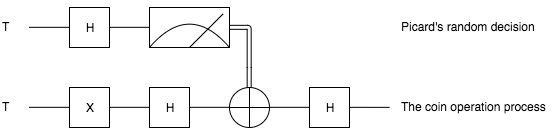

In [3]:
p += X(0)
p += H(0)
p += H(1)
p += CNOT(1, 0)
p += H(0)

We use the quantum mechanics principle of deferred measurement to keep all the measurement logic separate from the gates. Our method call to the WavefunctionSimulator will handle measuring for us.

Finally, we play the game several times. (Remember to run your qvm server.)

In [4]:
wf_sim.run_and_measure(p, trials=10)

array([[1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

In each trial, the first number is the outcome of the game, whereas the second number represents the human’s choice to flip or not flip the penny.

Inspecting the results, we see that no matter what the human does, the AGI will always win!

What human's didn't anticipate is that the AGI has access to quantum tools. Instead of flipping the penny, the AGI puts the penny into a superposition of heads and tails proportional to the quantum state |H⟩+|T⟩. Then no matter whether a human flips the penny or not, it will stay in a superposition (though the relative sign might change). In the third step the AGI undoes the superposition and always finds the penny to show heads.